In [3]:
import pandas as pd
import os

process_path = "F://work study//ILLC//S2B3-project//Weights Task Dataset//Weights Task Dataset//linguistic data processing"
files = os.listdir(process_path)

In [227]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [4]:
# The directory list of original transcript files
dir_list = []
for file in files:
    file_complete_dir = process_path + "//" + file
    dir_list.append(file_complete_dir)

print(dir_list)

['F://work study//ILLC//S2B3-project//Weights Task Dataset//Weights Task Dataset//linguistic data processing//Group_01_Oracle.csv', 'F://work study//ILLC//S2B3-project//Weights Task Dataset//Weights Task Dataset//linguistic data processing//Group_02_Oracle.csv', 'F://work study//ILLC//S2B3-project//Weights Task Dataset//Weights Task Dataset//linguistic data processing//Group_03_Oracle.csv', 'F://work study//ILLC//S2B3-project//Weights Task Dataset//Weights Task Dataset//linguistic data processing//Group_04_Oracle.csv', 'F://work study//ILLC//S2B3-project//Weights Task Dataset//Weights Task Dataset//linguistic data processing//Group_05_Oracle.csv', 'F://work study//ILLC//S2B3-project//Weights Task Dataset//Weights Task Dataset//linguistic data processing//Group_06_Oracle.csv', 'F://work study//ILLC//S2B3-project//Weights Task Dataset//Weights Task Dataset//linguistic data processing//Group_07_Oracle.csv', 'F://work study//ILLC//S2B3-project//Weights Task Dataset//Weights Task Dataset//l

In [5]:
# Starting with a trial file
trial_csv = "F://work study//ILLC//S2B3-project//Weights Task Dataset//Weights Task Dataset//linguistic data processing//Group_01_Oracle.csv"

In [6]:
# This is the trial code chunck looping over all following turns of the starting turn to check if they fit in the 
# defined standard of interruptions
def extract_interruptions(csv):
    original_df = pd.read_csv(csv)
    filtered_df = pd.DataFrame(columns = original_df.columns)

    rows_to_add = []

    for i in range(len(original_df)-1):
        row_1 = original_df.iloc[i]
        for j in range(i+1, len(original_df)):
            row_2 = original_df.iloc[j]

            if row_1["Participant"] != row_2["Participant"] and row_1["Participant"] != 4 and row_2["Participant"] != 4:
                if (row_2["Start"] > row_1["Start"] and
                    row_2["Start"] <= row_1["End"] and
                    row_2["End"] > row_1["End"]):
                    if len(row_2["Transcript"]) >= 10:
                       rows_to_add.append(row_1)
                       rows_to_add.append(row_2)
    
    if rows_to_add:
        filtered_df = pd.concat([pd.DataFrame([row]) for row in rows_to_add])
    else:
        filtered_df = pd.DataFrame(columns = original_df.columns) 
    
    return filtered_df

In [7]:
extract_interruptions(trial_csv)

,Utterance,Start,End,Group,Participant,Transcript
24,24,78.08,80.58,1,1,Ok well it would be nine minus ten
26,26,80.58,84.30,1,2,That's ten so then
45,45,135.33,135.91,1,3,Yes
46,46,135.73,136.41,1,2,Yeah thirty
50,50,149.25,154.25,1,2,Yeah ten ten twenty thirty
51,51,153.21,155.25,1,3,Twenty thirty forty
56,56,172.56,183.58,1,1,So we said this ones thirty I still feel like ...
57,57,174.54,185.08,1,2,Yeah yeah the blue dark blue one is thirty tha...
67,67,214.47,216.45,1,1,Um
69,69,216.16,217.66,1,2,It's just like slightly


In [8]:
# The working function that actually extract interruptions to csv files
def extract_interruptions_to_csv(csv):
    original_df = pd.read_csv(csv)
    filtered_df = pd.DataFrame(columns = original_df.columns)

    rows_to_add = []

    # A double-layer loop structure, first looping over all rows in the original table
    for i in range(len(original_df)-1):
        row_1 = original_df.iloc[i]
        # Further loop over all rows (turns) after the starting row looped above
        for j in range(i+1, len(original_df)):
            row_2 = original_df.iloc[j]            

            # Check if any of these rows meet the standard of what is defined as an interruption
            # 1) Two different participants are involved and the orginazer (participant 4) is excluded
            # 2) The interrupting turn should start after the interrupted turn
            # 3) The interrupting turn should start before the time stamp where the interrupted turn is ended
            # 4) The interrupting turn should end later than the interrupted turn
            # 5) The interrupting turn should be longer than a threadshold (here specified as 10, so that it's not just a filler)
            #  (or should this be checked manually?)
            if row_1["Participant"] != row_2["Participant"] and row_1["Participant"] != 4 and row_2["Participant"] != 4:
                if (row_2["Start"] > row_1["Start"] and
                    row_2["Start"] < row_1["End"] and
                    row_2["End"] > row_1["End"]):
                    if len(row_2["Transcript"]) >= 10:
                       rows_to_add.append(row_1)
                       rows_to_add.append(row_2)
        
    if rows_to_add:
        filtered_df = pd.concat([pd.DataFrame([row]) for row in rows_to_add])
    else:
        filtered_df = pd.DataFrame(columns = original_df.columns)

    filtered_df.to_csv(f"{csv[-19:-4]}_interruptions.csv")

In [9]:
# This is the trial code chunck looping over all following turns of the starting turn to check if they fit in the 
# defined standard of unsuccessful overlaps
def extract_uns_overlap(csv):
    original_df = pd.read_csv(csv)
    filtered_df = pd.DataFrame(columns = original_df.columns)

    rows_to_add = []

    for i in range(len(original_df)-1):
        row_1 = original_df.iloc[i]
        for j in range(i+1, len(original_df)):
            row_2 = original_df.iloc[j]

            if row_1["Participant"] != row_2["Participant"] and row_1["Participant"] != 4 and row_2["Participant"] != 4:
                if (row_2["Start"] > row_1["Start"] and
                    row_2["Start"] < row_1["End"] and
                    row_2["End"] < row_1["End"]):
                    rows_to_add.append(row_1)
                    rows_to_add.append(row_2)
    
    if rows_to_add:
        filtered_df = pd.concat([pd.DataFrame([row]) for row in rows_to_add])
    else:
        filtered_df = pd.DataFrame(columns = original_df.columns) 
    
    return filtered_df

In [10]:
extract_uns_overlap(trial_csv)

,Utterance,Start,End,Group,Participant,Transcript
19,19,69.81,71.51,1,1,Where's the survey oh ok
20,20,70.51,70.01,1,3,Um it's turned off
24,24,78.08,80.58,1,1,Ok well it would be nine minus ten
25,25,78.58,78.08,1,3,One
32,32,102.39,105.87,1,1,Um ok so now
...,...,...,...,...,...,...
206,206,738.16,738.42,1,3,Yeah
212,212,760.41,771.36,1,1,It was wow ok we we got that one correct becau...
213,213,760.58,764.58,1,2,Yeah that was a good thought
215,215,780.15,783.54,1,1,That's why you need three minds


In [257]:
# The working function that actually extract unsuccessful overlaps to csv files
def extract_uns_overlap_to_csv(csv):
    original_df = pd.read_csv(csv)
    filtered_df = pd.DataFrame(columns = original_df.columns)

    rows_to_add = []

    for i in range(len(original_df)-1):
        row_1 = original_df.iloc[i]
        for j in range(i+1, len(original_df)):
            row_2 = original_df.iloc[j]
            
            # Check if any of these rows meet the standard of what is defined as an unsuccessful overlap
            # 1) Two different participants are involved and the orginazer (participant 4) is excluded
            # 2) The trying-to-overlap turn should start after the overlapped turn
            # 3) The trying-to-overlap turn should start before the time stamp where the overlapped turn is ended
            # 4) The trying-to-overlap should end earlier than the starting turn, so that it's
            #    unsuccessufl (the nature of this trying-to-overlap turn will be manually labelled)
            if row_1["Participant"] != row_2["Participant"] and row_1["Participant"] != 4 and row_2["Participant"] != 4:
                if (row_2["Start"] > row_1["Start"] and
                    row_2["Start"] < row_1["End"] and
                    row_2["End"] < row_1["End"]):
                    rows_to_add.append(row_1)
                    rows_to_add.append(row_2)
    
    if rows_to_add:
        filtered_df = pd.concat([pd.DataFrame([row]) for row in rows_to_add])
    else:
        filtered_df = pd.DataFrame(columns = original_df.columns) 
   
    # differentiating "overlapped" and "trying-to-overlap" turns with stipulative index
    stipulative_index = [i % 2 for i in range(len(filtered_df))]
    filtered_df.index = stipulative_index
    
    filtered_df.to_csv(f"{csv[-19:-4]}_uns_overlaps.csv")

In [12]:
extract_uns_overlap_to_csv(trial_csv)

In [13]:
# Looping over all original transcrpit files to extract interruptions and unsuccessful overlaps into group-wise csv files
for dir in dir_list:
    extract_interruptions_to_csv(dir)
    extract_uns_overlap_to_csv(dir)

In [25]:
# At this stage, all the csv files of unsuccessful overlaps are manually reviewed to:
#  1) Determine the motivation of trying-to-overlap turns (competitive/supportive?);
#  2) Check out "suspicious" overlapped turns to determine if they are really related to dominance:
#     - Turns with short length but occupying long time windows (transcrpit error, actually with gaps but written as a whole turn)
#     - Multiple turns defined as being overlapped in the same time window / by the same turn

# Manually-labelled uns-ov files are put into this path
uns_overlap_path = "F://work study//ILLC//S2B3-project//uns_overlaps"

In [87]:
# Phase 1: adding two columns of "int(erruptions)" and "uns-ov" to original csv dataframes
# purely based on automated processing by their definitions,
# then extract them to the phase_1 folder
def adding_dominance_phase_1(csv):
    original_df = pd.read_csv(csv)
    original_df['int'] = 0
    original_df['uns-ov'] = 0

    for i in range(len(original_df)-1):
        row_1 = original_df.iloc[i]
        for j in range(i+1, len(original_df)):
            row_2 = original_df.iloc[j]

            if row_1["Participant"] != row_2["Participant"] and row_1["Participant"] != 4 and row_2["Participant"] != 4:
                if (row_2["Start"] > row_1["Start"] and
                    row_2["Start"] < row_1["End"] and
                    row_2["End"] > row_1["End"]):
                    if len(row_2["Transcript"]) >= 10:
                        original_df.at[j,'int'] = 1

                elif (row_2["Start"] > row_1["Start"] and
                    row_2["Start"] <= row_1["End"] and
                    row_2["End"] < row_1["End"]):
                    original_df.at[i,'uns-ov'] = 1

    original_df.to_csv(f"F://work study//ILLC//S2B3-project//phase_1//{csv[-19:-4]}_pre.csv")

In [89]:
adding_dominance_phase_1(trial_csv)

In [91]:
trial_pre = "F://work study//ILLC//S2B3-project//phase_1//Group_01_Oracle_pre.csv"

In [99]:
uns_overlap_path+"//"+trial_pre[45:60]+"_uns_overlaps.csv"

'F://work study//ILLC//S2B3-project//uns_overlaps//Group_01_Oracle_uns_overlaps.csv'

In [245]:
# Phase 2: The last step adjustment based on manual labeling results from video reviewing,
# eliminating "fake donimating" overlapped turns by changing their uns-ov values to 0 
# and add uncaptured ones in unsuccessful overlaps
# then extract them to the phase_2 folder
def adding_dominance_phase_2(csv):
    pre_df = pd.read_csv(csv, index_col=0)
    manual_df = pd.read_csv(uns_overlap_path+"//"+csv[45:60]+"_uns_overlaps.csv",index_col=0)
    utnum_collector = []

    for i in range(len(manual_df)):
        row = manual_df.iloc[i]
        if row['Manual Labeling 1'] == 'Passive':
            utnum_collector.append(row['Utterance'])

    for j in range(len(pre_df)):
        row = pre_df.iloc[j]
        if row['Utterance'] not in utnum_collector:
            pre_df.at[j, 'uns-ov'] = 0
        else:
            pre_df.at[j, 'uns-ov'] = 1

    pre_df.to_csv(f"F://work study//ILLC//S2B3-project//phase_2//{csv[45:60]}_final.csv")

In [249]:
adding_dominance_phase_2(trial_pre)

In [253]:
# The visualization function in trial
def visualize_par_dom(file_path):
    df = pd.read_csv(file_path,index_col=0)
    # Only participants 1,2,3 are relevant
    df = df[df['Participant'].isin([1, 2, 3])]

    # Creating the plot
    fig, ax = plt.subplots()

    # Setting labels on both axis
    ax.set_xlabel('Time in seconds')
    ax.set_ylabel('Participants')

    # Acquiring time info for x axis
    start_time = df['Start'].min()
    end_time = df['End'].max()

    # Setting the range of x axis
    ax.set_xlim(start_time, end_time)

    # Setting the range of y axis
    ax.set_yticks([1, 2, 3])
    ax.set_yticklabels(['Participant 1', 'Participant 2', 'Participant 3'])

    # Using a grid as background
    ax.grid(True)

    # Defining colors
    # Interruptions are marked with dark colors, uns-ov are marked with light colors
    colors = {
    (1, 'int'): 'darkred', (1, 'uns-ov'): 'lightcoral',
    (2, 'int'): 'darkblue', (2, 'uns-ov'): 'lightskyblue',
    (3, 'int'): 'darkgreen', (3, 'uns-ov'): 'lightgreen'
}

    # Plotting down lines of utterences by participants
    for _, row in df.iterrows():
        if row['int'] == 1:
            ax.plot([row['Start'], row['End']], [row['Participant'], row['Participant']], color=colors[(row['Participant'], 'int')], linewidth=2)
        elif row['uns-ov'] == 1:
            ax.plot([row['Start'], row['End']], [row['Participant'], row['Participant']], color=colors[(row['Participant'], 'uns-ov')], linewidth=2)
    # Legend setting
    legend_lines = [mlines.Line2D([], [], color='white', label='Participant 1'),
                mlines.Line2D([], [], color='darkred', label='  dominance defined by interruptions'),
                mlines.Line2D([], [], color='lightcoral', label='  dominance defined by unsuccessful overlaps'),
                mlines.Line2D([], [], color='white', label=''),
                mlines.Line2D([], [], color='white', label='Participant 2'),
                mlines.Line2D([], [], color='darkblue', label='  dominance defined by interruptions'),
                mlines.Line2D([], [], color='lightskyblue', label='  dominance defined by unsuccessful overlaps'),
                mlines.Line2D([], [], color='white', label=''),
                mlines.Line2D([], [], color='white', label='Participant 3'),
                mlines.Line2D([], [], color='darkgreen', label='  dominance defined by interruptions'),
                mlines.Line2D([], [], color='lightgreen', label='  dominance defined by unsuccessful overlaps')
                ]

    ax.legend(handles=legend_lines, loc='upper right', bbox_to_anchor=(1.8, 1))

    plt.show()

In [185]:
final_trial = 'F://work study//ILLC//S2B3-project//phase_2//Group_01_Oracle_final.csv'

In [283]:
final_trial[45:66]

'Group_01_Oracle_final'

In [305]:
final_trial[45:53]

'Group_01'

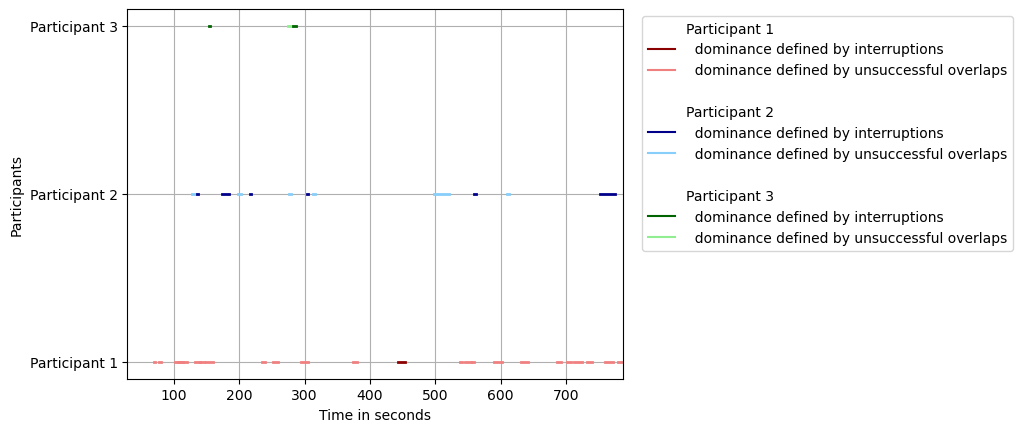

In [255]:
visualize_par_dom(final_trial)

In [307]:
# The visualization function saving graphs to local files
def visualize_par_dom_save(file_path):
    df = pd.read_csv(file_path,index_col=0)
    # Only participants 1,2,3 are relevant
    df = df[df['Participant'].isin([1, 2, 3])]

    # Creating the plot
    fig, ax = plt.subplots()

    # Setting labels on both axis
    ax.set_xlabel('Time in seconds')
    ax.set_ylabel('Participants')

    # Acquiring time info for x axis
    start_time = df['Start'].min()
    end_time = df['End'].max()

    # Setting the range of x axis
    ax.set_xlim(start_time, end_time)

    # Setting the range of y axis
    ax.set_yticks([1, 2, 3])
    ax.set_yticklabels(['Participant 1', 'Participant 2', 'Participant 3'])

    # Using a grid as background
    ax.grid(True)

    # Defining colors
    # Interruptions are marked with dark colors, uns-ov are marked with light colors
    colors = {
    (1, 'int'): 'darkred', (1, 'uns-ov'): 'lightcoral',
    (2, 'int'): 'darkblue', (2, 'uns-ov'): 'lightskyblue',
    (3, 'int'): 'darkgreen', (3, 'uns-ov'): 'lightgreen'
}

    # Plotting down lines of utterences by participants
    for _, row in df.iterrows():
        if row['int'] == 1:
            ax.plot([row['Start'], row['End']], [row['Participant'], row['Participant']], color=colors[(row['Participant'], 'int')], linewidth=2)
        elif row['uns-ov'] == 1:
            ax.plot([row['Start'], row['End']], [row['Participant'], row['Participant']], color=colors[(row['Participant'], 'uns-ov')], linewidth=2)
    # Legend setting
    legend_lines = [mlines.Line2D([], [], color='white', label='Participant 1'),
                mlines.Line2D([], [], color='darkred', label='  dominance defined by interruptions'),
                mlines.Line2D([], [], color='lightcoral', label='  dominance defined by unsuccessful overlaps'),
                mlines.Line2D([], [], color='white', label=''),
                mlines.Line2D([], [], color='white', label='Participant 2'),
                mlines.Line2D([], [], color='darkblue', label='  dominance defined by interruptions'),
                mlines.Line2D([], [], color='lightskyblue', label='  dominance defined by unsuccessful overlaps'),
                mlines.Line2D([], [], color='white', label=''),
                mlines.Line2D([], [], color='white', label='Participant 3'),
                mlines.Line2D([], [], color='darkgreen', label='  dominance defined by interruptions'),
                mlines.Line2D([], [], color='lightgreen', label='  dominance defined by unsuccessful overlaps')
                ]

    ax.legend(handles=legend_lines, loc='upper right', bbox_to_anchor=(1.8, 1))
    plt.title(f'{file_path[45:53]} Participatory Dominance')

    plt.savefig(f"F://work study//ILLC//S2B3-project//visualization//{file_path[45:66]}.png",bbox_inches='tight', pad_inches=0.1)

In [259]:
for dir in dir_list:
    adding_dominance_phase_1(dir)

In [291]:
pre_path = "F://work study//ILLC//S2B3-project//phase_1"
final_path = "F://work study//ILLC//S2B3-project//phase_2"

In [271]:
pre_files = os.listdir(pre_path)

pre_file_list = []
for file in pre_files:
    pre_file_complete_dir = pre_path + "//" + file
    pre_file_list.append(pre_file_complete_dir)

print(pre_file_list)

['F://work study//ILLC//S2B3-project//phase_1//Group_01_Oracle_pre.csv', 'F://work study//ILLC//S2B3-project//phase_1//Group_02_Oracle_pre.csv', 'F://work study//ILLC//S2B3-project//phase_1//Group_03_Oracle_pre.csv', 'F://work study//ILLC//S2B3-project//phase_1//Group_04_Oracle_pre.csv', 'F://work study//ILLC//S2B3-project//phase_1//Group_05_Oracle_pre.csv', 'F://work study//ILLC//S2B3-project//phase_1//Group_06_Oracle_pre.csv', 'F://work study//ILLC//S2B3-project//phase_1//Group_07_Oracle_pre.csv', 'F://work study//ILLC//S2B3-project//phase_1//Group_08_Oracle_pre.csv', 'F://work study//ILLC//S2B3-project//phase_1//Group_09_Oracle_pre.csv', 'F://work study//ILLC//S2B3-project//phase_1//Group_10_Oracle_pre.csv']


In [295]:
final_files = os.listdir(final_path)

final_file_list = []
for file in final_files:
    final_file_complete_dir = final_path + "//" + file
    final_file_list.append(final_file_complete_dir)

print(final_file_list)

['F://work study//ILLC//S2B3-project//phase_2//Group_01_Oracle_final.csv', 'F://work study//ILLC//S2B3-project//phase_2//Group_02_Oracle_final.csv', 'F://work study//ILLC//S2B3-project//phase_2//Group_03_Oracle_final.csv', 'F://work study//ILLC//S2B3-project//phase_2//Group_04_Oracle_final.csv', 'F://work study//ILLC//S2B3-project//phase_2//Group_05_Oracle_final.csv', 'F://work study//ILLC//S2B3-project//phase_2//Group_06_Oracle_final.csv', 'F://work study//ILLC//S2B3-project//phase_2//Group_07_Oracle_final.csv', 'F://work study//ILLC//S2B3-project//phase_2//Group_08_Oracle_final.csv', 'F://work study//ILLC//S2B3-project//phase_2//Group_09_Oracle_final.csv', 'F://work study//ILLC//S2B3-project//phase_2//Group_10_Oracle_final.csv']


In [273]:
for path in pre_file_list:
    adding_dominance_phase_2(path)

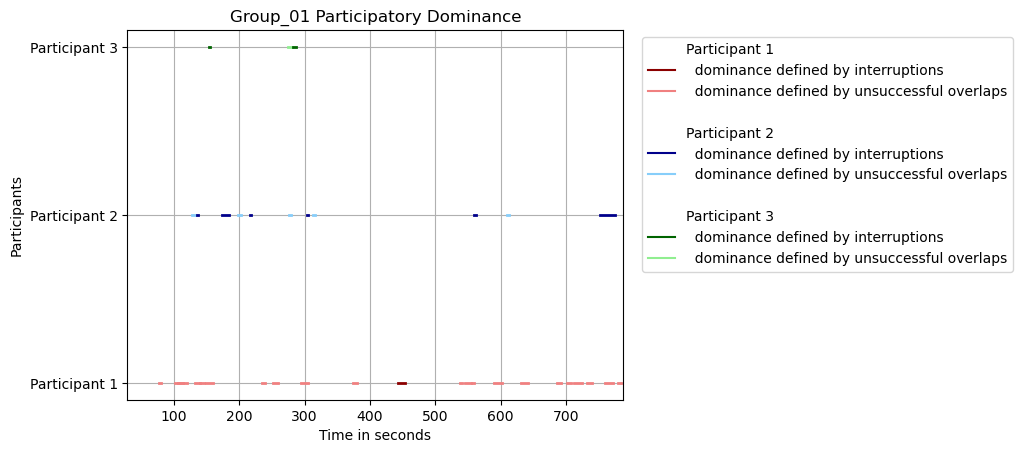

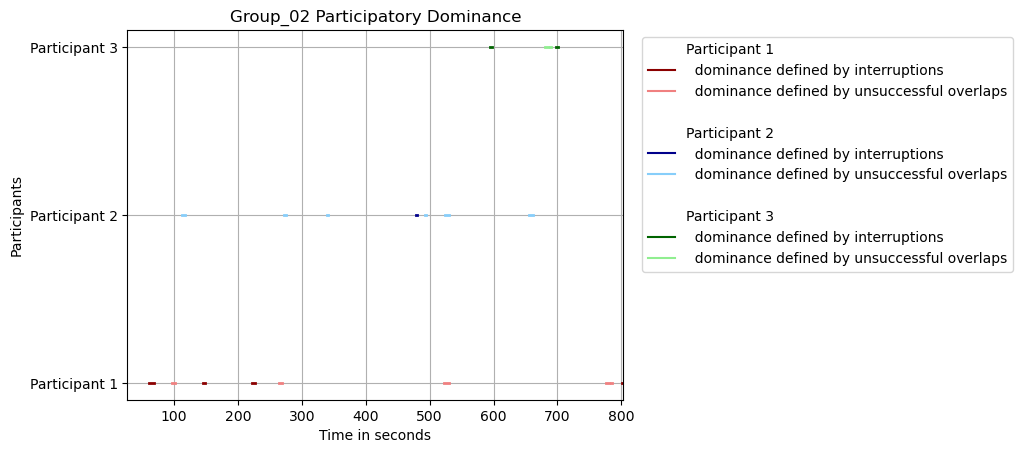

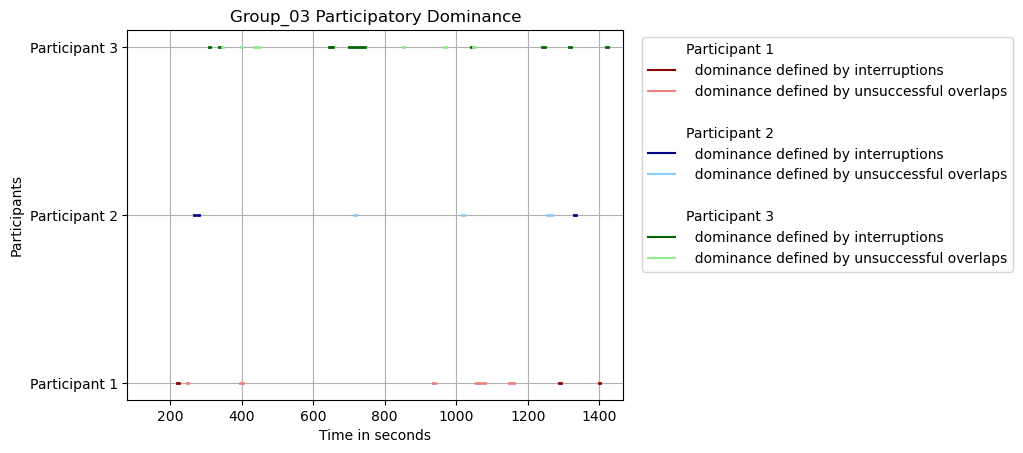

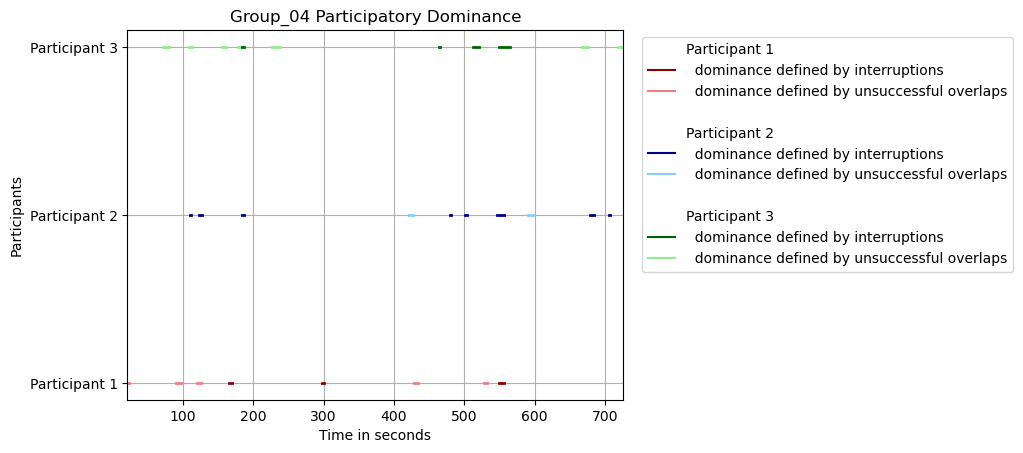

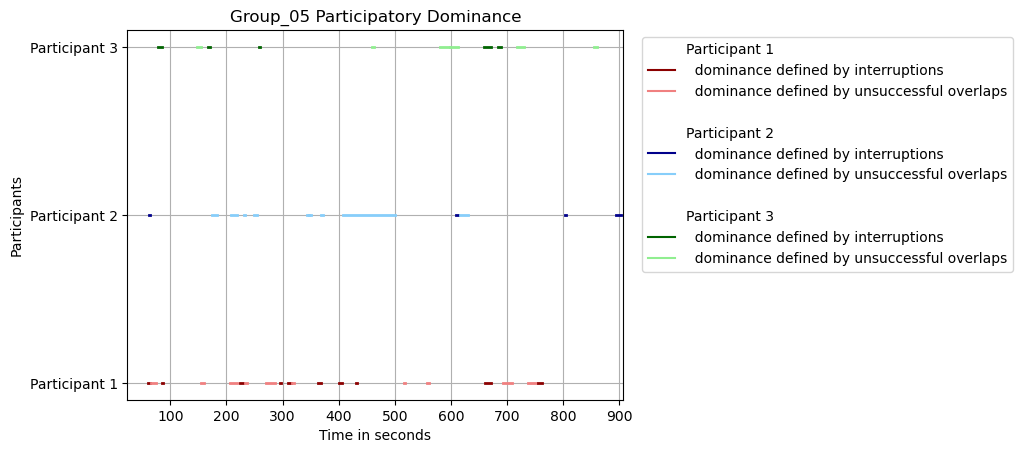

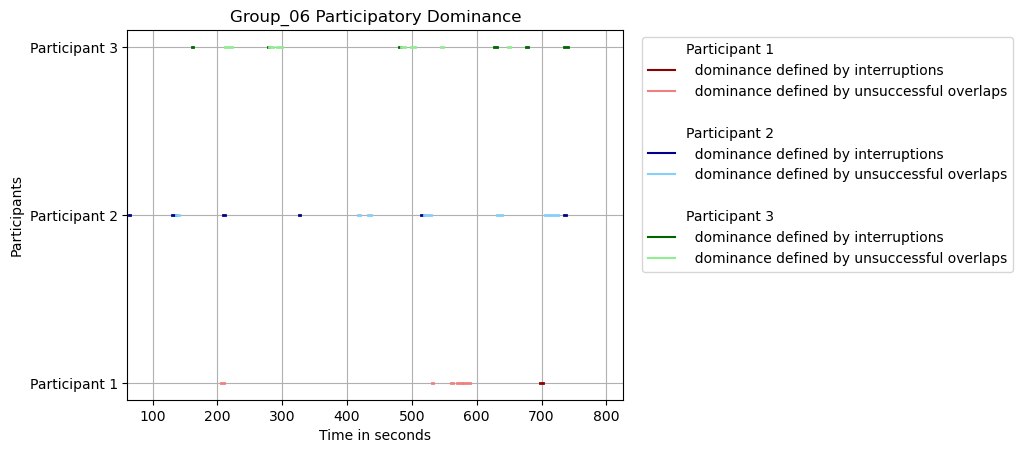

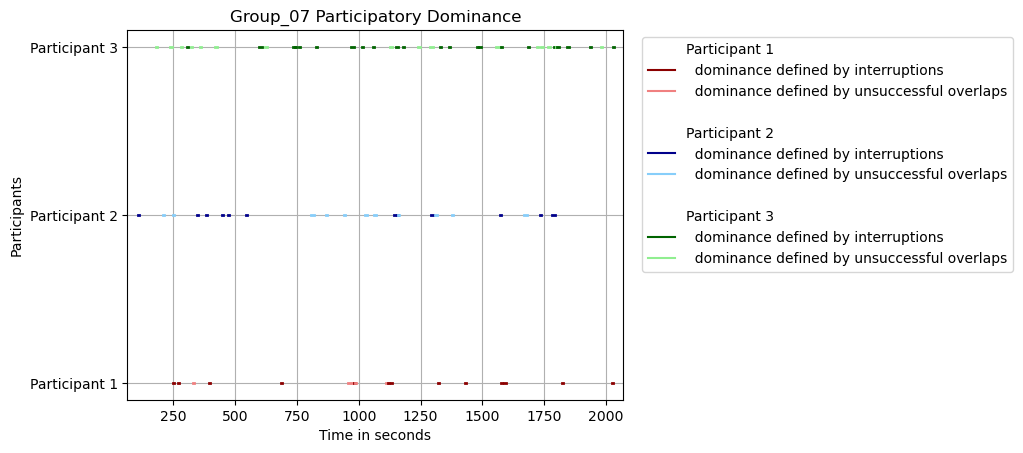

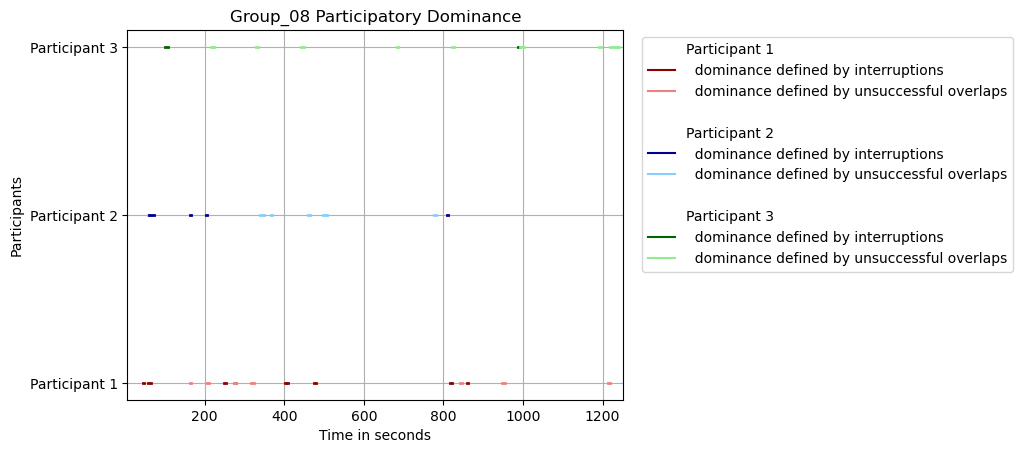

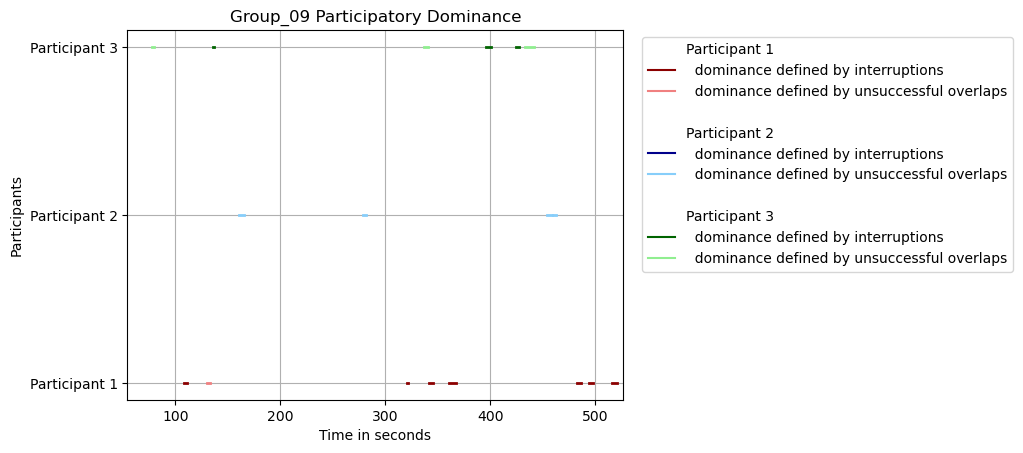

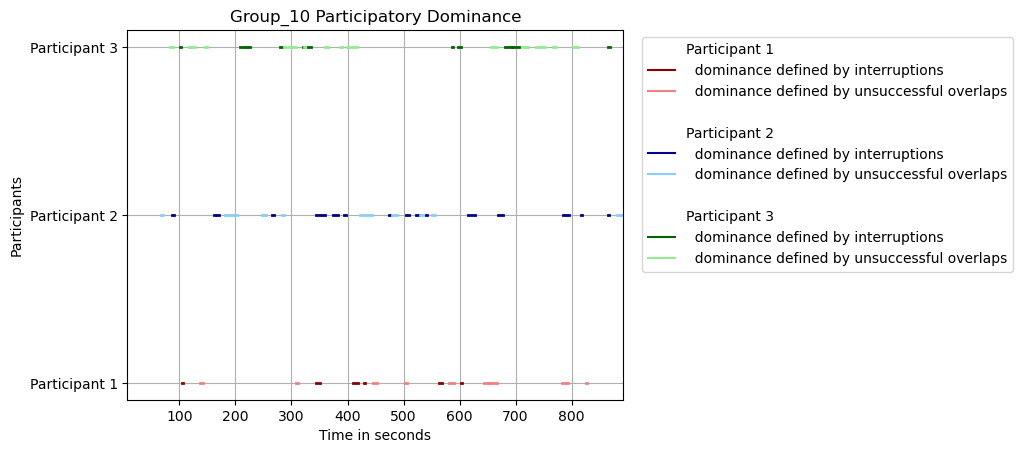

In [309]:
for path in final_file_list:
    visualize_par_dom_save(path)